In [113]:
import pandas as pd
import sklearn
import scipy
import numpy as np
import seaborn

## Download the data file

In [114]:
data = pd.read_csv("diabetes_data.csv")

## Data Preprocessing

### a) Changing categorial data into binary values

In [115]:
# Change all categorial into binary values
# Male will be 0 and Female will be 1 (seems to make the models work better)
data = data.replace(["Yes", "No", "Male", "Female", "Positive", "Negative"], [1, 0, 0, 1, 1, 0])
# data = data.drop("Age", axis=1)
data.Age

0      40
1      58
2      41
3      45
4      60
       ..
515    39
516    48
517    58
518    32
519    42
Name: Age, Length: 520, dtype: int64

### b) Change continuous "Age" column to binary

In [116]:
#Assess the mean and range of age
data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Age Distribution')

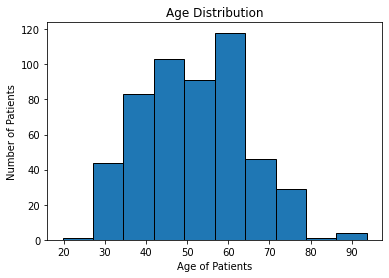

In [117]:
#See data distribution by age on histogram
import matplotlib.pyplot as plt
plt.hist(data['Age'], align="right", edgecolor='black')
plt.xlabel("Age of Patients")
plt.ylabel("Number of Patients")
plt.title("Age Distribution")

In [118]:
#Decide that 48 is a good age to split the data evenly
#you will want to only run this square once, or it will turn all values to 0. 
age = 48
data['Age'] = np.where(data['Age']<=age,0, data['Age'])
data['Age'] = np.where(data['Age']>age, 1, data['Age'])
data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.446154,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,0.497571,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection methods

<AxesSubplot:>

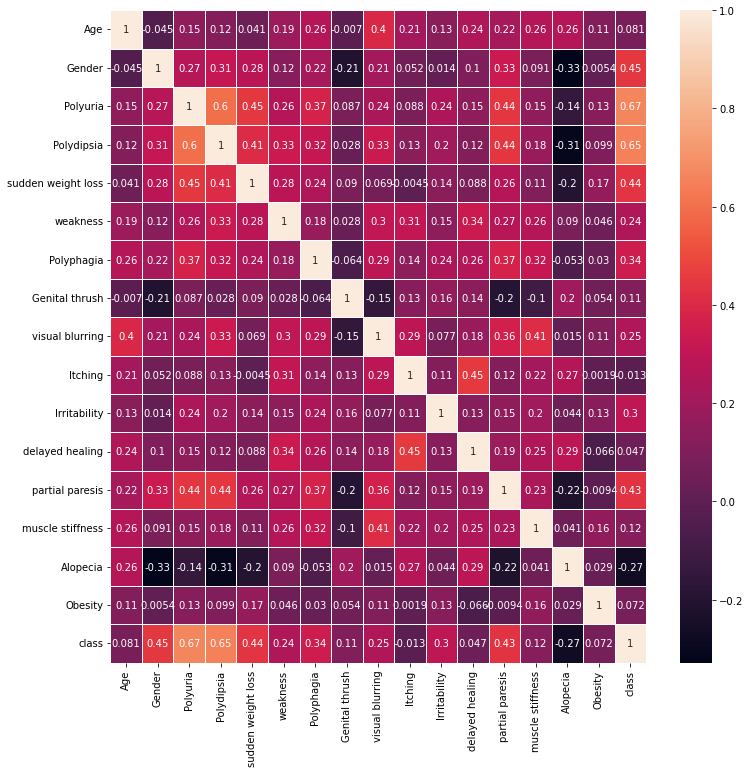

In [119]:
# First try Pearson's correlation
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
correlation = data.corr(method="pearson")
seaborn.heatmap(correlation, annot=True, linewidths=0.5, ax=ax)

In [120]:
for col in data:
    print(correlation[col].sort_values(ascending=False))
    print("\n")

Age                   1.000000
visual blurring       0.397107
muscle stiffness      0.263705
Alopecia              0.261688
Polyphagia            0.258368
delayed healing       0.243509
partial paresis       0.219232
Itching               0.209936
weakness              0.187936
Polyuria              0.153917
Irritability          0.133487
Polydipsia            0.117050
Obesity               0.110795
class                 0.081354
sudden weight loss    0.040675
Genital thrush       -0.007005
Gender               -0.045385
Name: Age, dtype: float64


Gender                1.000000
class                 0.449233
partial paresis       0.332288
Polydipsia            0.312262
sudden weight loss    0.281840
Polyuria              0.268894
Polyphagia            0.219968
visual blurring       0.208092
weakness              0.124490
delayed healing       0.101978
muscle stiffness      0.090542
Itching               0.052496
Irritability          0.013735
Obesity               0.005396
Age        

In [121]:
#Check for low variance features
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(.90*(1-.90))
no_target = data.drop("class", axis=1)
selector.fit_transform(no_target)

array([[0, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [122]:
#use a chi-test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
col_num = 16
select_chi = SelectKBest(chi2, k="all")
select_chi.fit(data.iloc[:,:col_num].values, data.iloc[:, -1].values)
chi_scores = select_chi.scores_
minimum_score = min(chi_scores)
chi_scores
# np.where(chi_scores == minimum_score)

array([1.90614224e+00, 6.61938802e+01, 1.16184593e+02, 1.20785515e+02,
       5.77493088e+01, 1.27242623e+01, 3.31984177e+01, 4.91400862e+00,
       1.81245708e+01, 4.78260870e-02, 3.53341270e+01, 6.20188285e-01,
       5.53142857e+01, 4.87500000e+00, 2.44027933e+01, 2.25028409e+00])

In [123]:
# data = data.drop(columns=['Itching'])


In [124]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


## Model 1) KNN, KNN-Weighted

In [125]:
#split the data into test set(20%) and training set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=43)
#make a copy of training set just incase we accidentally mutate data
train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

In [126]:
from sklearn.neighbors import KNeighborsClassifier
#default of number of neighbors
col_num = 16
num_neighbors = 5
train_features = train_set_copy.iloc[:,:col_num].values
train_target = train_set_copy.iloc[:, -1].values
neigh = KNeighborsClassifier(n_neighbors = num_neighbors)
neigh.fit(train_features, train_target)

KNeighborsClassifier()

In [127]:
#Below is KNN weighted
neigh_weighted = KNeighborsClassifier(n_neighbors = num_neighbors, weights="distance")
neigh_weighted.fit(train_features, train_target)

KNeighborsClassifier(weights='distance')

### Use Analysis of n-fold, cross validation, and confusion matrix

In [128]:
#Test accuracy
from sklearn.metrics import accuracy_score
#observe accuracy for KNN
test_features = test_set_copy.iloc[:, :col_num].values
knn_predictions = neigh.predict(test_features)
knn_weighted_predictions = neigh_weighted.predict(test_features)
actual = test_set_copy.iloc[:, -1]
#observe accuracy for KNN weighted
knn_acc = accuracy_score(knn_predictions, actual)
knn_weighted = accuracy_score(knn_weighted_predictions, actual)
print("KNN score: ", knn_acc)
print("KNN weighted score: ", knn_weighted)

KNN score:  0.9134615384615384
KNN weighted score:  0.9230769230769231


In [129]:
# function to plot KNN algorithm that uses Scikit-learn. 
import matplotlib.pyplot as plt
def plot_sklearn_knn (weighted="uniform"):
    k_values = []
    error_rate = []
    for i in range(1, 30):
        k_values.append(i)
        neigh = KNeighborsClassifier(n_neighbors = i, weights=weighted)
        neigh.fit(train_set_copy.iloc[:,:col_num].values, train_set_copy.iloc[:, -1].values)
        predictions = neigh.predict(test_set_copy.iloc[:, :-1].values)
        actual = test_set_copy.iloc[:, -1]
        error = 1 - accuracy_score(predictions, actual)
        error_rate.append(error)
    plt.xlabel("k-values")
    plt.ylabel("Error Rate")
    plt.title("Using Sklearn KNN")
    plt.plot(k_values, error_rate)
    plt.show()
        

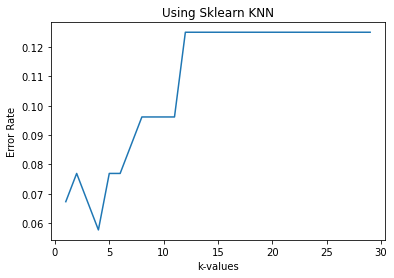

In [130]:
plot_sklearn_knn("distance")        

In [131]:
#set number of neighbors to 5, optimal value we saw from analysis. 
num_neighbors = 5
neigh = KNeighborsClassifier(n_neighbors = num_neighbors)
X_values = train_set_copy.iloc[:,:col_num].values
Y_values = train_set_copy.iloc[:, -1].values
neigh.fit(X_values, Y_values)

KNeighborsClassifier()

In [132]:
#nfold cross validation for KNN weighted
scores_weighted = cross_val_score(neigh_weighted, train_features, train_target, cv = 7)
print(f"Scores: {scores_weighted}")
print(f"Mean: {scores_weighted.mean()}")
print(f"Standard Deviation: {scores_weighted.std()}")

Scores: [0.96666667 0.93333333 0.91666667 0.98305085 0.98305085 0.94915254
 1.        ]
Mean: 0.9617029862792574
Standard Deviation: 0.027757579843720653


In [133]:
#Confusion matrix for KNN weighted
def confusion_matrix_sklearn ():
    neigh_confusion_matrix = confusion_matrix(actual, knn_weighted_predictions)
    classification = classification_report(actual, knn_weighted_predictions)
    print(neigh_confusion_matrix)
    print(classification)
confusion_matrix_sklearn()

[[36  3]
 [ 5 60]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        39
           1       0.95      0.92      0.94        65

    accuracy                           0.92       104
   macro avg       0.92      0.92      0.92       104
weighted avg       0.92      0.92      0.92       104



## Model 2) Naive Bayes

In [134]:
## Fit to naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_features, train_target)

GaussianNB()

In [135]:
## Observe initial accuracy
naive_predictions = gnb.predict(test_features)
naive_acc = accuracy_score(naive_predictions, actual)
print(f"Naive Bayes Accuracy: {naive_acc}" )

Naive Bayes Accuracy: 0.9038461538461539


In [136]:
### Use Analysis of n-fold, cross validation, and confusion matrix
naive_scores = cross_val_score(gnb, X_values, Y_values, cv = 7)
print(f"Scores: {naive_scores}")
print(f"Mean: {naive_scores.mean()}")
print(f"Standard Deviation: {naive_scores.std()}")

Scores: [0.9        0.81666667 0.9        0.91525424 0.91525424 0.94915254
 0.88135593]
Mean: 0.8968119451170299
Standard Deviation: 0.037989201065367864


In [137]:
def confusion_matrix_learn (actual, predictions):
    neigh_confusion_matrix = confusion_matrix(actual, predictions)
    classification = classification_report(actual, predictions)
    print(neigh_confusion_matrix)
    print(classification)
confusion_matrix_learn(actual, naive_predictions)

[[34  5]
 [ 5 60]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.92      0.92      0.92        65

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.90      0.90      0.90       104



## Model 3) SVM 

In [138]:
from sklearn import svm
SVM_Clss = svm.SVC()
SVM_Clss.fit(train_features, train_target)

SVC()

In [139]:
#observe accuracy for SVM
SVM_predictions = SVM_Clss.predict(test_features)
svm_acc = accuracy_score(SVM_predictions, actual)
print(f"SVM acc: {svm_acc}" )

SVM acc: 0.9519230769230769


In [140]:
### Use Analysis of n-fold, cross validation, and confusion matrix
svm_scores = cross_val_score(SVM_Clss, X_values, Y_values, cv = 7)
print(f"Scores: {svm_scores}")
print(f"Mean: {svm_scores.mean()}")
print(f"Standard Deviation: {svm_scores.std()}")

Scores: [0.98333333 0.96666667 0.96666667 0.98305085 0.98305085 0.96610169
 0.94915254]
Mean: 0.9711460855528652
Standard Deviation: 0.011839811328801785


In [141]:
confusion_matrix_learn(actual, SVM_predictions)

[[36  3]
 [ 2 63]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.95      0.97      0.96        65

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



## Model 4) Decision Tree

In [142]:
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree = dec_tree.fit(train_features, train_target)
dec_tree_predictions = dec_tree.predict(test_features)
dec_acc = accuracy_score(dec_tree_predictions, actual)
print(f"Decistion Tree Accuracy: {dec_acc}" )

Decistion Tree Accuracy: 0.8942307692307693


In [143]:
### Use Analysis of n-fold, cross validation, and confusion matrix
dec_scores = cross_val_score(dec_tree, X_values, Y_values, cv = 7)
print(f"Scores: {dec_scores}")
print(f"Mean: {dec_scores.mean()}")
print(f"Standard Deviation: {dec_scores.std()}")

Scores: [0.96666667 0.93333333 0.96666667 0.98305085 0.98305085 0.98305085
 0.93220339]
Mean: 0.9640032284100082
Standard Deviation: 0.02088914748496453


In [144]:
confusion_matrix_learn(actual, dec_tree_predictions)

[[36  3]
 [ 8 57]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        39
           1       0.95      0.88      0.91        65

    accuracy                           0.89       104
   macro avg       0.88      0.90      0.89       104
weighted avg       0.90      0.89      0.90       104

